In [221]:
# This is a cell to hide code snippets from displaying
# Any cell that contains the word "hide_me" will be hidden.

from IPython.display import HTML

hide_me = 'hide_me'
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      if (id == 0 || $(this).html().indexOf('hide_me') > -1) {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:100" type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Background

In less than twenty years, Enron Corporation was founded, achieved a high of $90.75 USD per share, and went bankrupt. 

Several years after the company was founded, executive employees such as Jeffrey Skilling used various accounting methods, manipulation, and deception to hide billions of dollars of Enron debt. 


http://www.bartlingforensic.com/the-enron-data-set-where-did-it-come-from/
Bartling, Joe (September 3, 2015). "The Enron Data Set - Where Did It Come From?". Bartling Forensic and Advisory. Retrieved December 22, 2016.

### The Enron Dataset

There were three different 'persons of interest' hand-generated for this dataset:
1. Those indicted
2. Those who settled without admitting guilt
3. Those who testified in exchange for immunity

Emails are collected for over 150 different individuals.

### The Purpose: Predicting POI

The goal of this project is to use machine learning techniques to create a method of predicting persons of interest. We have data records for 146 different individuals employed at Enron. Information about the financial and communication activity of these individuals during their time at Enron my show correlations to whether or not they committed fraud. Machine learning algorithms can help to find these underlying correlations and use them to predict which individuals committed fraud by building models. 

Not only do these models help us to understand what may have been going on behind the scenes at Enron, they may help people to detect this type of fraud in the future. Every company is different, and although the model that I will be building may not be suitable to detect suspicious activity at other companies, similar machine learning techniques can be used to model behavior in many different situations in order to make useful predictions.




In [8]:
%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects"

# load dataset

C:\Users\schro\Desktop\Projects\DataAnalysisND\P5-Machine\ud120-projects


## Data Overview

The Enron dataset is made up of 146 unique name entries, with each having 21 pieces of information (e.g. salary, expenses, poi). Out of the 146 individuals, 18 of them were persons of interest, as defined above, leaving 128 non-POI.

The features in the data fall into three main types: financial features, email features and POI labels. They are explained using the descriptions included in the original FindLaw dataset PDF document.


### Financial Features (in USD)

**'salary'** Reflects items such as base salary, executive cash allowances, and benefits payments.

**'bonus'** Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.

**'deferred_income'** Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors
under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.

**'deferral_payments'** Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.

**'loan_advances'** Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the
promissory notes allow for the option to repay with stock of the company.

**'long_term_incentive'** Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.

**'director_fees'** Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.

**'expenses'** Reflects reimbursements of business expenses. May include fees paid for consulting services.

**'other'** Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e.
housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to
employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.

**'total_payments'** Total sum of above categories

#### Stock Value Features (USD)

**'exercised_stock_options'** Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through
cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and
the timing of any subsequent sale of the securities.

**'restricted_stock'** Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting
periods, regardless of whether deferred.

**'restricted_stock_deferred'** Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.

**'total_stock_value'** Total sum of three stock values above. 

In 1998, 1999 and 2000, Debtor and non-debtor affiliates were charged for options granted. The Black-Scholes method was used to determine the amount to be
charged. Any amounts charged to Debtor and non-debtor affiliates associated with the options exercised related to these three years have not been subtracted
from the share value amounts shown.

### Email Features (number of emails)
**'to_messages'** Number of messages received. 

**'from_messages'** Number of messages sent.

**'shared_receipt_with_poi'** Number of emails received that were also received by a POI.

**'from_this_person_to_poi'** Number of emails sent to POI.

**'from_poi_to_this_person'** Number of emails received from POI.

 
###  Labels
**'poi'** POI status (integer, 0=Non-POI, 1=POI).

**'email_address'** Personal email address (string).


There are 35 individuals listed as a POI as gathered by hand (primarily from http://usatoday30.usatoday.com/money/industries/energy/2005-12-28-enron-participants_x.htm). Since we only have data and emails for 18 of these people, we will not be able to get as strong as a signal as we would be able to with the full data for the known POI. 

I also created a dictionary 'nan_dict' with counts of the number of missing values for each feature. Missing values are represented as 'NaN' for this dataset. The three feature with the most missing values were:

'director_fees': 129, 'loan_advances': 142, 'restricted_stock_deferred': 128

It's likely that these categories had missing values because most individuals never paid director fees or deferred stock. These values should be changed from 'NaN' to 0 to numerically compare these data to that of other individuals.

{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 35,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 60,
 'from_poi_to_this_person': 60,
 'from_this_person_to_poi': 60,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'poi': 0,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 60,
 'to_messages': 60,
 'total_payments': 21,
 'total_stock_value': 20}

In [32]:
import pickle
import pprint 

enron_data = pickle.load(open("final_project/final_project_dataset.pkl", "r"))
#dictionary made up of keys with names (146 total)

print 'Number of individuals:', len(enron_data.keys())

#dictionaries for each name made up of 21 different entries
print 'Information for each individual:',enron_data.values()[0].keys()
print 'Number of entries for each individual:', len(enron_data.values()[1].keys())

#number of POI according to definition above
poi_names=[]
for name in enron_data:
    if enron_data[name]['poi']==1:
        poi_names.append(name)
print 'Number of POI:',len(poi_names)

#listed POI names
poi_total=open('final_project/poi_names.txt','r')
poi_total = poi_total.read().split(',')
#count names using comma as divider (disregard one count)
print 'Number of POI from compiled list:', len(poi_total)-1

#Count NaN entry count for each key
key_list=enron_data.values()[0].keys()

nan_dict=dict.fromkeys(key_list)

for key in key_list:
    i=0
    for name in enron_data:
        if enron_data[name][key]=='NaN':
            i+=1
    nan_dict[key]=i
pprint.pprint(nan_dict)


Number of individuals: 146
Information for each individual: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
Number of entries for each individual: 21
Number of POI: 18
Number of POI from compiled list: 35
{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 35,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 60,
 'from_poi_to_this_person': 60,
 'from_this_person_to_poi': 60,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'poi': 0,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 60,
 'to_messages': 60,
 'tot

## Outliers

I visualized the features in the data using two boxplots: one plot for financial features and one for email features. Several things stood out to me. Almost all of the features had outliers outside of the IQR. I'll look at the largest points for each of the features to make sure they seem valid. I also noticed that some categories (such as 'restricted stock deferred') have both positive and negative values. I will also look at the negative data to understand if they should be analyzed as negative values and if they are valid.

When I first plotted the data, an extreme outlier showed up in the financial data. I realized that this is due to the 'total' row shown in the PDF, which was adding the total of all financial data for each individual. I removed this row from the dictionary so that it would not show up in my plots and the scale would make it possible to screen for other outliers.



C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


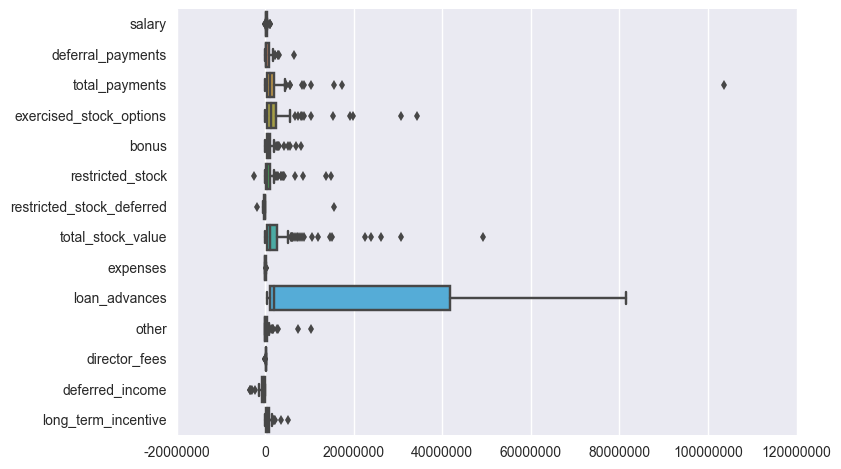

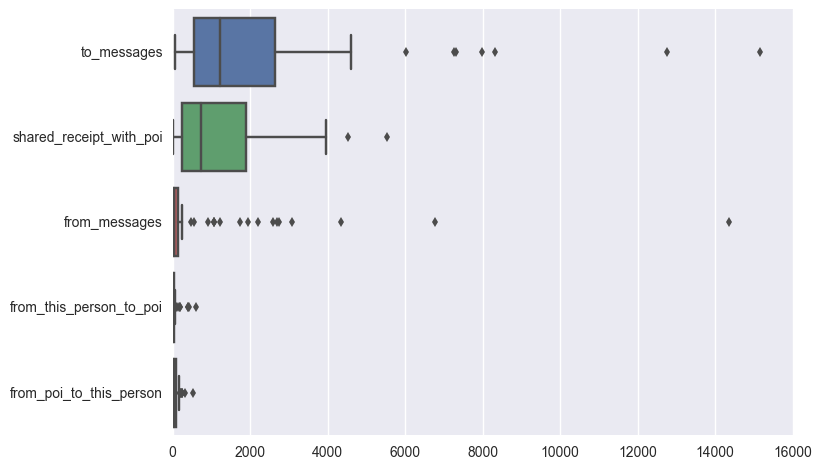

In [148]:
enron_data.pop("TOTAL", 0)

import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pandas as pd

enron_df=pd.DataFrame(enron_data)
enron_df=enron_df.transpose()
enron_df=enron_df.convert_objects(convert_numeric=True)

financial_keys=['salary',  'deferral_payments', 'total_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']
email_keys=['to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person']
#enron_df[financial_keys].plot(kind='box',subplots=True)
#print enron_df.head()
#create axis
fig, ax = plt.subplots()
#create boxplot
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#sns.swarmplot(data=enron_df[financial_keys],orient='h',ax=ax, color=".025")
sns.boxplot(data=enron_df[financial_keys],orient='h',ax=ax)
plt.show()

fig2, ax2 = plt.subplots()
sns.boxplot(data=enron_df[email_keys],orient='h')
plt.show()



## Numerically Analyzing Outliers

In order to observe the outliers more closely, I wrote a function 'largest' to find the largest values for a specified .

I first looked at the financial data. The largest outlier was in the 'total payments' category, being the only value greater than one hundred million (100,000,000). It makes sense that the 'total payments' would have the largest value since it is composed of the sums of other financial features. This outlier was associated with CEO Kenneth Lay.

Looking through the largest values in other categories, I didn't see anything that looked invalid, but the summary will be useful as a reference when building models. I did notice that some categories contained both positive and negative values. In these categories, the data all had the same sign convention except for the data for Robert Belfer and Sanjay Bhatnager. In looking at their data entries on the original PDF, I found that sign conventions in the PDF were corrected, but the sign convention in this data was transferred incorrectly.

I edited all data for these two individuals to reflect the correct entries in the PDF. The new dictionary with fixed values was named 'enron_fix'.

I was curious about the distribution of 'load advances'. It turns out that there were only three sums of money recorded as loan advances:

1. ['LAY KENNETH L', 81525000, True],
2. ['FREVERT MARK A', 2000000, False],
3. ['PICKERING MARK R', 400000, False]

It seems like most people did not receive loan advances. Other NaN values could be changed to 0, although this feature may not give a large signal since there are only three recorded loan advances.


In [174]:
#function to find the highest outliers
from pprint import pprint

def largest(enron_data,feature,num):   
    top_names={}
    i=1
    value=[float("inf"),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    individual=""
    poi=2
    while i<=num:
        for name in enron_data:
            if enron_data[name][feature]>value[i] and enron_data[name][feature]<value[i-1] and enron_data[name][feature]!='NaN':
                value[i]=enron_data[name][feature]
                individual=name
                poi=enron_data[name]['poi']   
        top_names[i]=[individual, value[i], poi]
        i+=1
    return top_names
    
def largest_negative(enron_data,feature,num):   
    top_names={}
    i=1
    value=[-float("inf"),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    individual=""
    poi=2
    while i<=num:
        for name in enron_data:
            if enron_data[name][feature]<value[i] and enron_data[name][feature]>value[i-1] and enron_data[name][feature]!='NaN':
                value[i]=enron_data[name][feature]
                individual=name
                poi=enron_data[name]['poi']   
        top_names[i]=[individual, value[i], poi]
        i+=1
    return top_names

for key in key_list:
    pprint(key)
    pprint(largest(enron_data,key,5))
    if largest_negative(enron_data,key,1)[1][0]!='':
        print 'Negative Values Found'
        pprint(largest_negative(enron_data,key,3))
    print '\n'


'salary'
{1: ['SKILLING JEFFREY K', 1111258, True],
 2: ['LAY KENNETH L', 1072321, True],
 3: ['FREVERT MARK A', 1060932, False],
 4: ['PICKERING MARK R', 655037, False],
 5: ['WHALLEY LAWRENCE G', 510364, False]}


'to_messages'
{1: ['SHAPIRO RICHARD S', 15149, False],
 2: ['KEAN STEVEN J', 12754, False],
 3: ['KITCHEN LOUISE', 8305, False],
 4: ['BELDEN TIMOTHY N', 7991, True],
 5: ['BECK SALLY W', 7315, False]}


'deferral_payments'
{1: ['FREVERT MARK A', 6426990, False],
 2: ['HORTON STANLEY C', 3131860, False],
 3: ['HUMPHREY GENE E', 2964506, False],
 4: ['ALLEN PHILLIP K', 2869717, False],
 5: ['HAEDICKE MARK E', 2157527, False]}


'total_payments'
{1: ['LAY KENNETH L', 103559793, True],
 2: ['FREVERT MARK A', 17252530, False],
 3: ['LAVORATO JOHN J', 10425757, False],
 4: ['SKILLING JEFFREY K', 8682716, True],
 5: ['MARTIN AMANDA K', 8407016, False]}


'exercised_stock_options'
{1: ['LAY KENNETH L', 34348384, True],
 2: ['HIRKO JOSEPH', 30766064, True],
 3: ['RICE KENNETH D', 1

In [175]:
#fix data for Belfer and Bhatnager
enron_fix=dict(enron_data)


enron_fix['BELFER ROBERT']['deferred_income'] = -102500
enron_fix['BELFER ROBERT']['deferral_payments'] = 'NaN'
enron_fix['BELFER ROBERT']['expenses'] = 3285
enron_fix['BELFER ROBERT']['director_fees'] = 102500
enron_fix['BELFER ROBERT']['total_payments'] = 3285
enron_fix['BELFER ROBERT']['exercised_stock_options'] = 'NaN'
enron_fix['BELFER ROBERT']['restricted_stock'] = 44093
enron_fix['BELFER ROBERT']['restricted_stock_deferred'] = -44093
enron_fix['BELFER ROBERT']['total_stock_value'] = 'NaN'

enron_fix['BHATNAGAR SANJAY']['other'] = 'NaN'
enron_fix['BHATNAGAR SANJAY']['expenses'] = 137864
enron_fix['BHATNAGAR SANJAY']['director_fees'] = 'NaN'
enron_fix['BHATNAGAR SANJAY']['total_payments'] = 137864
enron_fix['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
enron_fix['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
enron_fix['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
enron_fix['BHATNAGAR SANJAY']['total_stock_value'] = 15456290

for key in key_list:
    pprint(key)
    pprint(largest(enron_fix,key,5))
    if largest_negative(enron_fix,key,1)[1][0]!='':
        print 'Negative Values Found'
        pprint(largest_negative(enron_fix,key,3))
    print '\n'

    
enron_dff=pd.DataFrame(enron_fix)
enron_dff=enron_dff.transpose()
enron_dff=enron_dff.convert_objects(convert_numeric=True)



'salary'
{1: ['SKILLING JEFFREY K', 1111258, True],
 2: ['LAY KENNETH L', 1072321, True],
 3: ['FREVERT MARK A', 1060932, False],
 4: ['PICKERING MARK R', 655037, False],
 5: ['WHALLEY LAWRENCE G', 510364, False]}


'to_messages'
{1: ['SHAPIRO RICHARD S', 15149, False],
 2: ['KEAN STEVEN J', 12754, False],
 3: ['KITCHEN LOUISE', 8305, False],
 4: ['BELDEN TIMOTHY N', 7991, True],
 5: ['BECK SALLY W', 7315, False]}


'deferral_payments'
{1: ['FREVERT MARK A', 6426990, False],
 2: ['HORTON STANLEY C', 3131860, False],
 3: ['HUMPHREY GENE E', 2964506, False],
 4: ['ALLEN PHILLIP K', 2869717, False],
 5: ['HAEDICKE MARK E', 2157527, False]}


'total_payments'
{1: ['LAY KENNETH L', 103559793, True],
 2: ['FREVERT MARK A', 17252530, False],
 3: ['LAVORATO JOHN J', 10425757, False],
 4: ['SKILLING JEFFREY K', 8682716, True],
 5: ['MARTIN AMANDA K', 8407016, False]}


'exercised_stock_options'
{1: ['LAY KENNETH L', 34348384, True],
 2: ['HIRKO JOSEPH', 30766064, True],
 3: ['RICE KENNETH D', 1

C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## Feature Selection

Although twenty different features are provided, I would like to use the minimum number possible in order to capture trends in the data. The dataset is limited and using all of the features may cause overfitting 

To understand what we're looking for, I looked at some of the specific charges for Enron executives. Many of the charges included wire fraud, money laundering, securities fraud, mail fraud, and conspiracy. For example, Skilling approved quarterly reports sent to the Securities and Exchange Comission with incorrect revenues and earnings. He gave incorrect information to Wall Street analysts. He committed securities fraud when using Raptors (backed by Enron stock) to hedge inflated asset values and hide Enron debt.

Skilling was also accused of insider trading after selling $62.6 million in stock (ten different trades) after understanding the company's dire financial situation. Lay was accused of bank Fraud as he obtained 75 million in loans from three banks and broke his agreement not to use the loan to carry or buy Enron stock on margin.

Three employees of Greenwich Nat West were charged with wire fraud. Three bank officers secretly invested in an Enron special purpose entity, Southampton LP, and took $7.3 million in income that should have gone to Nat West. They recommended the entity to be sold for $1 million even though it had a value of $7-9 million. It's believed that they set up an offshore partnership along with Enron executives. They secretly nogotiated a purchase of interest, receiving the $7.3 billion belonging to Nat West.

In looking for these types of activities, I think that communication could play an important role. When discussing public communication about Enron's financial situation, it would be important for the Enron exuctives to be closely aligned. For this reason, I'll be looking at the levels of communication (email_keys) between employees.

I'll also be looking at how much money individuals were receiving as stock, salary, and bonuses. I think that all of the financial features may not have the same level of importance in detecting fraud. Business expenses might be more related to the employees role in the company and stock might be a better indicator of the individual's belief in the success of the company or their personal rewards.

I'll start by using univariate feature selection to see which of these features have the greatest impact on POI detection.

financial_keys=['salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']
                
email_keys=['to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person']

The features total_payments and total_stock_value are simply sums of the values of other features, I will not be including them in the models. The information contained in them is already contained in these sub-features and may be combined more efficiently through a model.



In [223]:
'hide_me'
#!/usr/bin/python
#Feature Format

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [254]:
#!/usr/bin/python

#%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects/validation"

import sys
sys.path.append("../tools/")


### first element is our labels, any added elements are predictor
### features.
feature_keys=['poi', 'salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive',
              'to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person']


financial_keys=['poi', 'salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']

financial_data = featureFormat(enron_fix, feature_keys,remove_NaN=True)
labels, features = targetFeatureSplit(financial_data)
#split data into test and training sets
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

skb=SelectKBest(f_classif, k=6)

#decision tree
from sklearn import tree

#scaler, data for decision tree does not need to be scaled
scaler =MinMaxScaler()
tree_clf=tree.DecisionTreeClassifier()

clf = Pipeline(steps=[("SKB", skb),("Tree",tree_clf)])


labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

#clf.fit(features_train,labels_train)
#poi_result=clf.fit_predict(features_test, labels_test)

X_new = SelectKBest(f_classif,k=6)
X_new.fit_transform(features_train,labels_train)

# Get SelectKBest scores, rounded to 2 decimal places, name them "feature_scores"
print X_new.scores_ 
# Get SelectKBest pvalues, rounded to 3 decimal places, name them "feature_scores_pvalues"

# Get SelectKBest feature names, whose indices are stored in 'X_new.get_support',
# create a tuple of feature names, scores and pvalues, name it "features_selected_tuple
indic= X_new.get_support(indices=True)
for i in indic:
    print feature_keys[i+1]
    print 'score',X_new.scores_[i]
    print 'p value', X_new.pvalues_[i]
    print ''
    


[  5.26235968   0.1231975    9.42004704  11.72056375   0.66177975
   0.51067257   4.7720034    0.20603774   0.05108771   2.11860012
   5.42402207   1.46708752   0.24580284   3.74431862   0.14310154
   2.67889745   3.27884574]
salary
score 5.26235967894
p value 0.023926358808

exercised_stock_options
score 9.4200470375
p value 0.00277628420114

bonus
score 11.7205637522
p value 0.000903684725941

expenses
score 4.77200340005
p value 0.0313107936027

deferred_income
score 5.4240220655
p value 0.0219153467458

shared_receipt_with_poi
score 3.74431862407
p value 0.0558703372236

0.795454545455
0.25
0.4


When looking at the kbest results for the top six variables, I looked at the p-value for the returned variable. The p-value indicates how likely an outcome is under the null hypothesis (the feature is not related to the POI prediction). I am interested in the variables that are most likely to be related to POI prediction so I am looking at the variables with the lowest p-value. 

For the financial data, the p-values of the six different variables in kbest analysis were all below 0.05 besides director fees, which had a p-value of 0.148. When using kbest analysis on email data, all p-values were around 0.5 except for shared_receipt_with_poi which has a p-value of 0.059. 

With these results, I chose to only use the top six variables for the email and financial data: shared receipt with POI, salary, exercised stock options, bonus, expenses, and deferred income.

In [259]:
#!/usr/bin/python

#%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects/validation"

import sys
sys.path.append("../tools/")


### first element is our labels, any added elements are predictor
### features.
feature_keys=['poi', 'salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive',
              'to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person']


financial_keys=['poi', 'salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(enron_fix, feature_keys,remove_NaN=True)
labels, features = targetFeatureSplit(data)
#split data into test and training sets
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#decision tree
from sklearn import tree

#scaler, data for decision tree does not need to be scaled
scaler =MinMaxScaler()
tree_clf=tree.DecisionTreeClassifier()

X_new = SelectKBest(f_classif,k=6)

clf = Pipeline(steps=[("SKB", X_new),("Tree",tree_clf)])


labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

clf.fit(features_train,labels_train)
poi_result=clf.fit_transform(features_test, labels_test)

from sklearn.metrics import accuracy_score
print (clf.score(labels_test, poi_result))

from sklearn.metrics import precision_score
print (precision_score(labels_test,poi_result))

from sklearn.metrics import recall_score
print (recall_score(labels_test,poi_result))

#listy=list(poi_result)
#print listy.count(1.)



C:\Users\schro\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\schro\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 17 and input n_features is 44 

In [253]:
def getToEmails(fname):
    with open(fname) as f:
        content = f.readlines()
        for c in content:
            if 'To:' in c:
                to_emails = c.replace(" ", "").split(':')[1][:-2].split(',')
                break
    return to_emails

In [252]:
#!/usr/bin/python

###
### in poiFlagEmail() below, write code that returns a boolean
### indicating if a given email is from a POI
###

import sys
import reader
import poi_emails

def getToFromStrings(f):
    '''
    The imported reader.py file contains functions that we've created to help
    parse e-mails from the corpus. .getAddresses() reads in the opening lines
    of an e-mail to find the To: From: and CC: strings, while the
    .parseAddresses() line takes each string and extracts the e-mail addresses
    as a list.
    '''
    f.seek(0)
    to_string, from_string, cc_string   = reader.getAddresses(f)
    to_emails   = reader.parseAddresses( to_string )
    from_emails = reader.parseAddresses( from_string )
    cc_emails   = reader.parseAddresses( cc_string )

    return to_emails, from_emails, cc_emails


### POI flag an email

def poiFlagEmail(f):
    """ given an email file f,
        return a trio of booleans for whether that email is
        to, from, or cc'ing a poi """

    to_emails, from_emails, cc_emails = getToFromStrings(f)

    ### poi_emails.poiEmails() returns a list of all POIs' email addresses.
    poi_email_list = poi_emails.poiEmails()

    to_poi = False
    from_poi = False
    cc_poi   = False

    
    ### to_poi and cc_poi are related functions, which flag whether
    ### the email under inspection is addressed to a POI, or if a POI is in cc
    ### you don't have to change this code at all

    ### there can be many "to" emails, but only one "from", so the
    ### "to" processing needs to be a little more complicated
    if to_emails:
        ctr = 0
        while not to_poi and ctr < len(to_emails):
            if to_emails[ctr] in poi_email_list:
                to_poi = True
            ctr += 1
    if cc_emails:
        ctr = 0
        while not to_poi and ctr < len(cc_emails):
            if cc_emails[ctr] in poi_email_list:
                cc_poi = True
            ctr += 1

    #################################
    ######## your code below ########
    ### set from_poi to True if #####
    ### the email is from a POI #####
    #################################
    if from_emails:
        ctr=0
        while not from_poi and ctr < len(from_emails):
            if from_emails[ctr] in poi_email_list:
                from_poi = True
            ctr += 1

    
    
    

    #################################
    return to_poi, from_poi, cc_poi

#look at fraction of emails to or from poi
import pickle
from get_data import getData

def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """


    ### you fill in this code, so that it returns either
    ###     the fraction of all messages to this person that come from POIs
    ###     or
    ###     the fraction of all messages from this person that are sent to POIs
    ### the same code can be used to compute either quantity

    ### beware of "NaN" when there is no known email address (and so
    ### no filled email features), and integer division!
    ### in case of poi_messages or all_messages having "NaN" value, return 0.
    if poi_messages == 'NaN' or all_messages=='NaN':
        fraction = 0.
    else:
        fraction=float(poi_messages)/all_messages
    return fraction

data_dict = getData() 

submit_dict = {}
for name in data_dict:

    data_point = data_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
   
    data_point["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    print fraction_to_poi
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    data_point["fraction_to_poi"] = fraction_to_poi
    
    
#####################

def submitDict():
    return submit_dict


ImportError: No module named reader

<type 'numpy.ndarray'>


ValueError: Found input variables with inconsistent numbers of samples: [44, 100]

[ 5.44814029]
-102360.543294
-1.48499241737
-0.123597985403


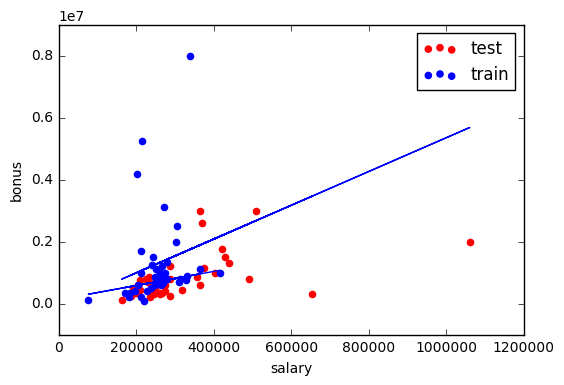

In [142]:
#!/usr/bin/python
 

print payment  
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "red"

from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(feature_train,target_train)
print reg.coef_
print reg.intercept_

print reg.score(feature_test,target_test)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)

plt.plot(feature_train, reg.predict(feature_train), color="b") 
print reg.score(feature_train,target_train)

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()



0.878262470366


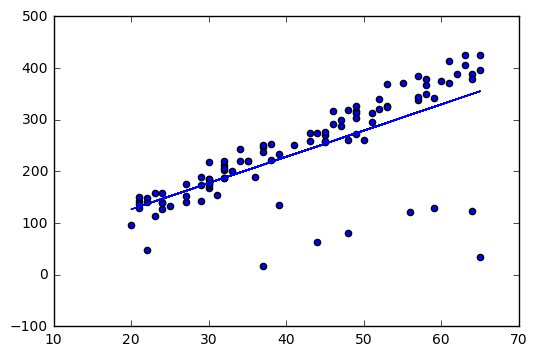

[[ 6.32006691]]
0.982470051004


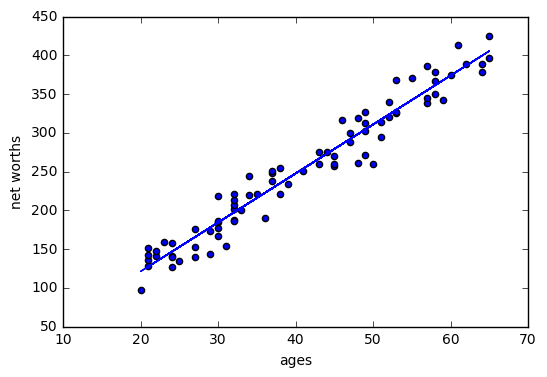

In [172]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    
    numbers=len(predictions)
    i=0
    while i<numbers:
        difference=abs(predictions[i]-net_worths[i])
        difference_set=(ages[i],net_worths[i],difference);
        cleaned_data.append(difference_set)
        i=i+1
    cleaned_data1=sorted(cleaned_data, key=lambda cleaned_data: cleaned_data[2]) 
    return cleaned_data1[0:80]

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape  command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)
print reg.score(ages_test,net_worths_test)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

#In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you
#will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets
#that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value
#of the net worths in the training set. There should be 90 elements in each of these lists (because the training 
#set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which
#are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81).
#The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print reg.coef_
        plt.plot(ages, reg.predict(ages), color="blue")
        print reg.score(ages_test, net_worths_test)
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In the mini-project for the regressions lesson, you used a regression to predict the bonuses for Enron employees. As you saw, even a single outlier can make a big difference on the regression result. There was something we didn’t tell you, though, which was that the dataset we had you use in that project had already been cleaned of some significant outliers. Identifying and cleaning away outliers is something you should always think about when looking at a dataset for the first time, and now you’ll get some hands-on experience with the Enron data.

You can find the starter code in outliers/enron_outliers.py, which reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.)

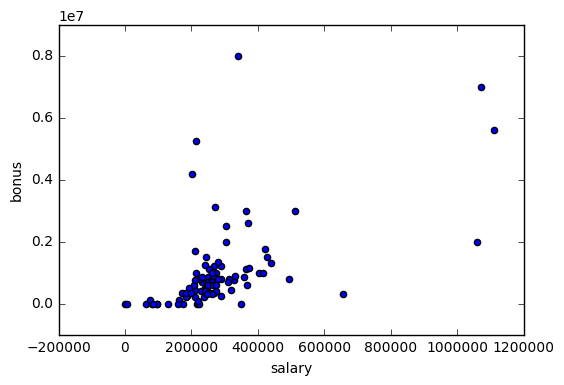

In [176]:
#!/usr/bin/python
#%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects/outliers"

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

#remove outlier from total row
data_dict.pop( "TOTAL" )

data = featureFormat(data_dict, features)


### your code below


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


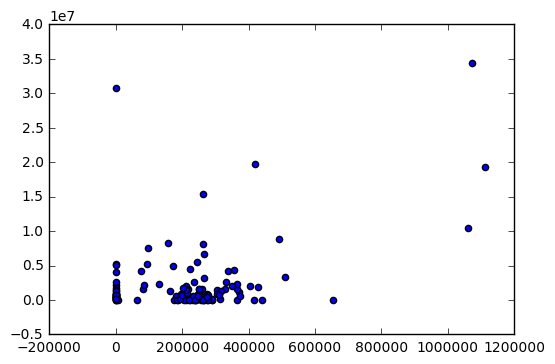

C:\Users\schro\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: operands could not be broadcast together with shapes (2,) (3,) (2,) 

In [234]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3="total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
for f1, f2 in finance_features:
### (as it's currently written, the line below assumes 2 features)
#for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()
pred=[]
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
import sklearn.cluster
mean=sklearn.cluster.KMeans(n_clusters=2)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

mean.fit(data)
arrr=numpy.array([200000., 1000000.])
testp= scaler.transform(arrr)
print testp
pred=mean.predict(data)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download()
sw=stopwords.words("english")

print len(sw)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


It's likely that POI were communicating more closely. I created a new feature to count the number of emails that each individual recieved from a person of interest.

A simple program to divide data into test and train sets and use a decision tree to predict POI based on salary.